Author: Fejiro obor

Stats and Public Health Part 2 Deliverable: Statistical Analysis

# Stats and Public Health Part 2_Deliverable

West Nile Virus (WNV) is a common illness that is usually spread by mosquitos. The virus has consistently been linked with sevaral cases of illness near Chicago, Illinois. This deliverable aims to use cleaned data provided by the city of Chicago to further analyze the relationship between the different variables and WNV Presence & number of mosquitos observed.

Question: How do the WNV positive records differ from the WNV negative ones?

This can be answered in terms of:
- Time of the year mosquito is caught (broken down by Year, Month & Week)
- Location of the mosquitoes
- Species of the mosquito
- Trap ID & trap type used

### Data Dictionary

`Year` :Year that the WNV test is performed - *int64*


`Week` :Week that the WNV test is performed - *int64*


`Address Block`: Address of the location of trap - *string*


`Block`: Block number of address - *int64*


`Trap`: Id of the trap - *string*. Some traps are \"satellite traps\". These are traps that are set up near (usually within 6 blocks) an established trap to enhance surveillance efforts. Satellite traps are post fixed with letters. For example, T220A is a satellite trap to T220.

`Trap type`: Type of trap - *string*


`Date`: Date and time that the WNV test is performed - *string*. Please note that not all the locations are tested at all times. Also, records exist only when a particular species of mosquitoes is found at a certain trap at a certain time.


`Mosquito number`: Number of mosquitoes caught in this trap - *int64*. These test results are organized in such a way that when the number of mosquitoes exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitoes are capped at 50.

`Mosquito ID`: Id for Mosquito species - *string*

`WNV Present`: Whether West Nile Virus was present in these mosquitos - *string*

`Species`: Mosquito species - *string*

`Lat`:Latitude of trap - *float64*

`Lon`: Longitude of trap - *float64*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
import statsmodels.api as sm

## Data Cleaning

In [2]:
df = pd.read_csv("mosquito_data_part_2.csv")
df.tail()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
18490,2016,36,3XX W 18TH ST,T043,GRAVID,2016-09-09 00:09:00,4,positive,CULEX PIPIENS,41.857843,-87.635858,9
18491,2007,34,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 00:08:00,19,positive,CULEX PIPIENS,41.965376,-87.758403,8
18492,2016,30,127XX S DOTY AVE,T115,GRAVID,2016-07-27 00:07:00,34,positive,CULEX RESTUANS,41.662395,-87.590176,7
18493,2017,33,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 00:08:00,50,positive,CULEX RESTUANS,41.919197,-87.664758,8
18494,2015,33,100XX W OHARE AIRPORT,T902,GRAVID,2015-08-20 00:08:00,6,positive,CULEX RESTUANS,41.977738,-87.880969,8


In [3]:
df.columns

Index(['Year', 'Week', 'Address Block', 'Trap', 'Trap type', 'Date',
       'Mosquito number', 'WNV Present', 'Species', 'Lat', 'Lon', 'Month'],
      dtype='object')

In [4]:
df = df[['Date', 'Year', 'Month', 'Week', 'Address Block', 'Lat', 'Lon', 'Trap', 'Trap type','Mosquito number',
         'Species', 'WNV Present']] #Re-arranging the order of our columns

In [5]:
df.shape

(18495, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             18495 non-null  object 
 1   Year             18495 non-null  int64  
 2   Month            18495 non-null  int64  
 3   Week             18495 non-null  int64  
 4   Address Block    18495 non-null  object 
 5   Lat              18495 non-null  float64
 6   Lon              18495 non-null  float64
 7   Trap             18495 non-null  object 
 8   Trap type        18495 non-null  object 
 9   Mosquito number  18495 non-null  int64  
 10  Species          18495 non-null  object 
 11  WNV Present      18495 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 1.7+ MB


There are 18495 rows and 12 columns in our dataset which contain float64, int64 and string data types

In [7]:
df.isna().sum(axis =0)

Date               0
Year               0
Month              0
Week               0
Address Block      0
Lat                0
Lon                0
Trap               0
Trap type          0
Mosquito number    0
Species            0
WNV Present        0
dtype: int64

There is no null data in our dataset and the count of values for each column matches the total number of rows. Next we can check for duplicates

In [8]:
df[df.duplicated()]

,Date,Year,Month,Week,Address Block,Lat,Lon,Trap,Trap type,Mosquito number,Species,WNV Present
15495,2018-08-23 00:08:00,2018,8,34,100XX W OHARE AIRPORT,41.977738,-87.880969,T912,GRAVID,3,CULEX PIPIENS,positive
15504,2011-08-12 00:08:00,2011,8,32,100XX W OHARE AIRPORT,41.977738,-87.880969,T916,GRAVID,11,CULEX PIPIENS,positive
15520,2010-08-20 00:08:00,2010,8,33,100XX W OHARE,41.977738,-87.880969,T903,GRAVID,27,CULEX RESTUANS,positive
15523,2016-08-25 00:08:00,2016,8,34,100XX W OHARE AIRPORT,41.977738,-87.880969,T911,GRAVID,8,CULEX RESTUANS,positive
15528,2017-08-24 00:08:00,2017,8,34,100XX W OHARE AIRPORT,41.977738,-87.880969,T900,GRAVID,2,CULEX RESTUANS,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
18476,2013-07-19 00:07:00,2013,7,29,100XX W OHARE AIRPORT,41.977738,-87.880969,T912,GRAVID,46,CULEX RESTUANS,positive
18477,2013-08-29 00:08:00,2013,8,35,100XX W OHARE AIRPORT,41.977738,-87.880969,T906,GRAVID,50,CULEX PIPIENS,positive
18486,2016-07-21 00:07:00,2016,7,29,100XX W OHARE AIRPORT,41.977738,-87.880969,T911,GRAVID,47,CULEX RESTUANS,positive
18488,2017-07-27 00:07:00,2017,7,30,100XX W OHARE AIRPORT,41.977738,-87.880969,T900,GRAVID,17,CULEX RESTUANS,positive


There are 658 rows of duplicate data within our dataset. The test results are organized in such a way that when the number of mosquitoes exceed 50 they are split into another row in the dataset. Hence, it is likely that a new row was added each time the sample size was larger than 50 causing us to have multiple duplicate rows where mosquito number is 50.

In [9]:
duplicate_df = df[df.duplicated()]
duplicate_df[duplicate_df['Mosquito number'] >= 50]

,Date,Year,Month,Week,Address Block,Lat,Lon,Trap,Trap type,Mosquito number,Species,WNV Present
15531,2015-07-02 00:07:00,2015,7,26,100XX W OHARE AIRPORT,41.977738,-87.880969,T902,GRAVID,50,CULEX RESTUANS,positive
15542,2018-06-21 00:06:00,2018,6,25,100XX W OHARE AIRPORT,41.977738,-87.880969,T912,GRAVID,50,CULEX RESTUANS,positive
15572,2016-07-27 00:07:00,2016,7,30,100XX W OHARE AIRPORT,41.977738,-87.880969,T913,GRAVID,50,CULEX RESTUANS,positive
15573,2016-08-04 00:08:00,2016,8,31,100XX W OHARE AIRPORT,41.977738,-87.880969,T912,GRAVID,50,CULEX RESTUANS,positive
15590,2015-08-06 00:08:00,2015,8,31,100XX W OHARE AIRPORT,41.977738,-87.880969,T923,GRAVID,50,CULEX RESTUANS,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
18329,2018-06-21 00:06:00,2018,6,25,100XX W OHARE AIRPORT,41.977738,-87.880969,T912,GRAVID,50,CULEX RESTUANS,positive
18335,2016-07-27 00:07:00,2016,7,30,100XX W OHARE AIRPORT,41.977738,-87.880969,T913,GRAVID,50,CULEX PIPIENS,positive
18387,2016-07-27 00:07:00,2016,7,30,100XX W OHARE AIRPORT,41.977738,-87.880969,T913,GRAVID,50,CULEX PIPIENS,positive
18473,2016-07-27 00:07:00,2016,7,30,100XX W OHARE AIRPORT,41.977738,-87.880969,T916,GRAVID,50,CULEX RESTUANS,positive


As seen above, we have 76 rows of duplicate data in our dataset where mosquito number is 50. We will keep these rows and exclude other duplicate rows where mosquito number is less than 50 since those should have been recorded just once.

In [10]:
# dropping duplicate rows where mosquito number is less than 50
df = df.drop(duplicate_df[duplicate_df['Mosquito number'] < 50].index, axis = 0)

In [11]:
df.shape

(17913, 12)

In [12]:
df.duplicated().sum()

76

After excluding the duplicated rows, we are left with 17,913 rows of non-null data to work with.

## Exploratory Data Analysis

To further analyze the date, we can split the columns into two based on the data types - Categorial & Numerical:

In [13]:
num_columns = df.select_dtypes('number').columns[:]
num_columns

Index(['Year', 'Month', 'Week', 'Lat', 'Lon', 'Mosquito number'], dtype='object')

In [14]:
categ_columns = df.select_dtypes('object').columns[:]
categ_columns

Index(['Date', 'Address Block', 'Trap', 'Trap type', 'Species', 'WNV Present'], dtype='object')

We can also look at how the data in the numerical columns are distributed:

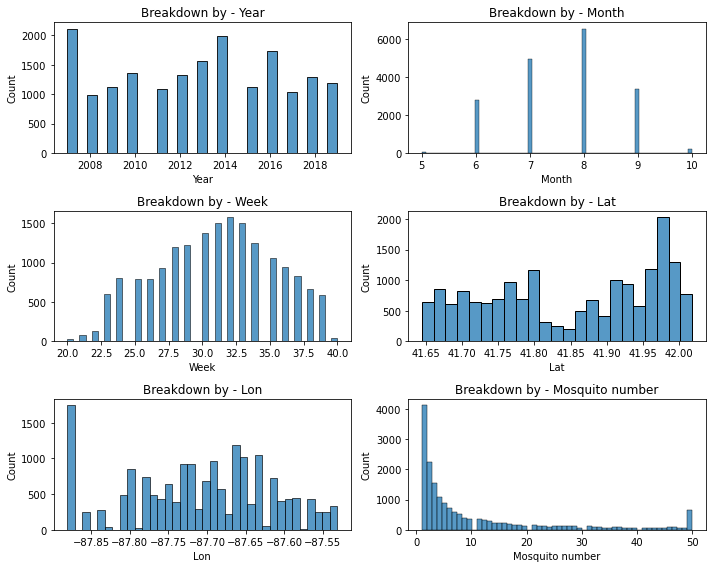

In [15]:
# Creating subplots to show the distribution of each numerical column

plt.subplots(3,2,figsize=(10,8))
plot_num=1
for column in num_columns:
    plt.subplot(3,2,plot_num)
    sns.histplot(data = df, x = column)
    #df.groupby('WNV Present')[column].count().plot(kind = 'barh')
    plt.title('Breakdown by - '+ column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plot_num +=1

plt.tight_layout()
plt.show()

- The highest number of tests were done in 2007. Although it varies by year, the count appears to be trending downward over time.
- The most number of samples were collected in August (8th month).
- The distribution of Mosquito number is not normal. It is heavily skewed to the right side of the graph.

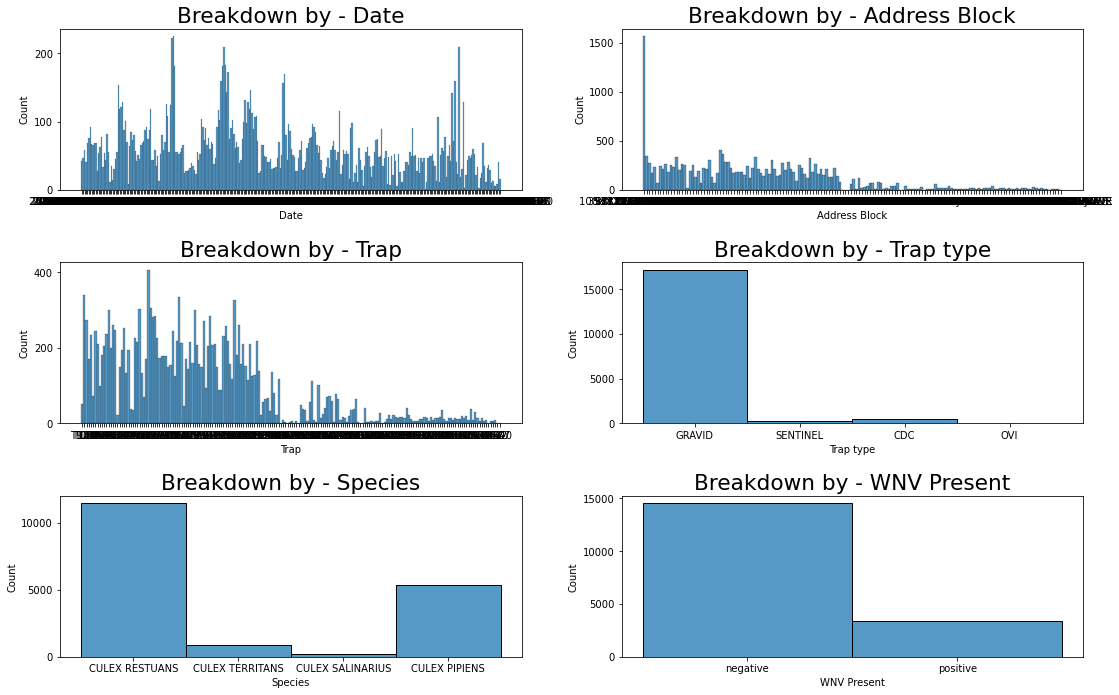

In [16]:
# Creating subplots to show the distribution of each numerical column

plt.subplots(3,2,figsize=(16,10))
plot_num=1
for column in categ_columns:
    plt.subplot(3,2,plot_num)
    sns.histplot(data = df, x = column)
    plt.rcParams['font.size'] = 18
    plt.title('Breakdown by - '+ column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plot_num +=1

plt.tight_layout()
plt.show()

From the charts above, we can see that:
- A large number of records were taken from one particular address block in our dataset
- GRAVID trap type was the most recorded in our dataset out of 4 unique types used.
- The most identified mosquito species was CULEX RESTUANS, out of 4 unique species seen.
- Our dataset is not balanced with respect to WNV positive and negative cases as we have a higher number of negative cases

In [17]:
round(df['WNV Present'].value_counts(normalize = True)*100,1)

negative    81.0
positive    19.0
Name: WNV Present, dtype: float64

At a quick glance we can see that out of 17,913 rows of test data, 19% represent WNV positive cases while 81.0% are WNV negative. Our dataset is not equally balanced between postive and negative cases.

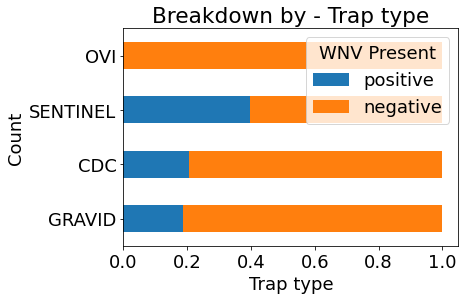

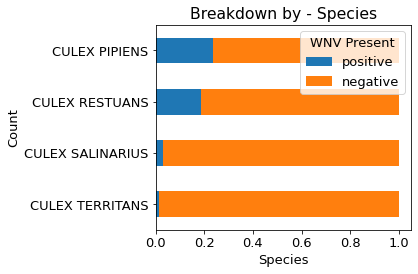

In [18]:
# Creating plots to show how WNV Presence varies among trap type & species columns

for column in ['Trap type', 'Species']:
    wnv = df.groupby([column, 'WNV Present'])['WNV Present'].count()/df.groupby(column)['WNV Present'].count()
    wnv.unstack()[['positive', 'negative']].sort_values("positive").plot(kind = 'barh', stacked=True)
    plt.title('Breakdown by - '+ column)
    plt.rcParams['font.size'] = 13
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

- Although not a lof of records were done using the SENTINEL & CDC trap types, both caught a higher proportion of WNV positive mosquitos compared to GRAVID trap type.
- CULEX PIPIENS Species showed the highest number of WNV positive cases, followed by CULEX RESTUANS

## Statistical Analysis

In [19]:
df.describe(include = "all")

,Date,Year,Month,Week,Address Block,Lat,Lon,Trap,Trap type,Mosquito number,Species,WNV Present
count,17913,17913.000000,17913.000000,17913.000000,17913,17913.000000,17913.000000,17913,17913,17913.000000,17913,17913
unique,298,NaN,NaN,NaN,154,NaN,NaN,190,4,NaN,4,2
top,2016-08-04 00:08:00,NaN,NaN,NaN,100XX W OHARE AIRPORT,NaN,NaN,T002,GRAVID,NaN,CULEX RESTUANS,negative
freq,225,NaN,NaN,NaN,1565,NaN,NaN,406,17170,NaN,11450,14501
mean,NaN,2012.859320,7.620052,30.971641,NaN,41.849345,-87.707935,NaN,NaN,10.626584,NaN,NaN
std,NaN,3.734186,1.006069,4.373486,NaN,0.114904,0.092311,NaN,NaN,13.403571,NaN,NaN
min,NaN,2007.000000,5.000000,20.000000,NaN,41.644720,-87.880969,NaN,NaN,1.000000,NaN,NaN
25%,NaN,2010.000000,7.000000,28.000000,NaN,41.746732,-87.770837,NaN,NaN,2.000000,NaN,NaN
50%,NaN,2013.000000,8.000000,31.000000,NaN,41.867599,-87.701388,NaN,NaN,4.000000,NaN,NaN
75%,NaN,2016.000000,8.000000,34.000000,NaN,41.964405,-87.643076,NaN,NaN,14.000000,NaN,NaN


Looking at the categorical columns, we can see there are 4 unique trap types and 4 unique mosquito species as seen in the table above. There are also 298 unique dates over which data was collected, 154 unique addresses and 190 unique trap IDs. Since these columns possess high cardinality, we will only use trap types and species colums to create dummy variables later on.

To determine whether there is a significant association between WNV Presence (positive/negative) and Mosquito Species, we can create a contingency table of both columns and perform  a chi-square test of independence:

In [20]:
# chi square test of independence

# H0: WNV Presence and mosquito species are independent
# H1: WNV Presence and mosquito species are not independent

species_contingency_table = pd.crosstab(df['WNV Present'],df['Species'])
species_contingency_table

Species,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
WNV Present,,,,
negative,4074,9309,215,903
positive,1250,2141,7,14


In [21]:
# run chi square test on the table above
chi2_stat, p_val, dof, expected = stats.chi2_contingency(species_contingency_table)

In [22]:
p_val #p-value

4.731085745792268e-62

In [23]:
expected # expected values

array([[4309.9047619 , 9269.04761905,  179.71428571,  742.33333333],
       [1014.0952381 , 2180.95238095,   42.28571429,  174.66666667]])

With a very low p-value of 4.73e-62 and a threshold of 0.05, we can safely reject the null hypothesis that WNV outcome is independent of the mosquito species and conclude that the species is statistically significant in predicting the WNV presence.

We can also repeat the same hypothesis test for trap type:

In [24]:
# chi square test of independence

# H0: WNV Presence and trap type are independent
# H1: WNV Presence and trap type are not independent

traps_contingency_table = pd.crosstab(df['WNV Present'],df['Trap type'])
traps_contingency_table

Trap type,CDC,GRAVID,OVI,SENTINEL
WNV Present,,,,
negative,423,13951,1,126
positive,110,3219,0,83


In [25]:
# run chi square test on the table above
chi2_stat, p_val, dof, expected = stats.chi2_contingency(traps_contingency_table)

p_val #p-value

5.894302806422253e-13

Similarly, we got a very low p-value 5.89e-13 that is below the threshold of 0.05. At this level, we can safely reject the null hypothesis that WNV outcome is independent of the trap type and also and conclude that the trap type is statistically significant in predicting the WNV presence.

To check if there is a statistically significant difference between the numerical columns with respect to the WNV Present column, we can perform two sample unpaired t-test:

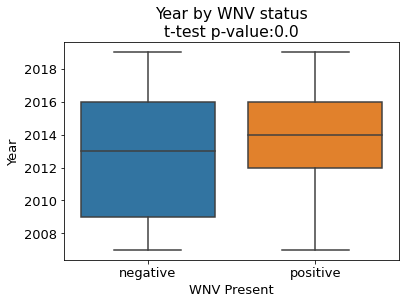

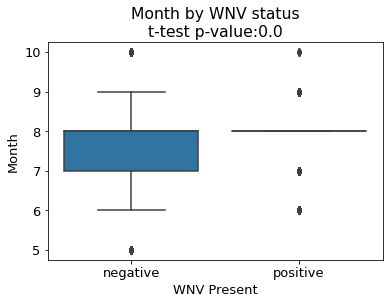

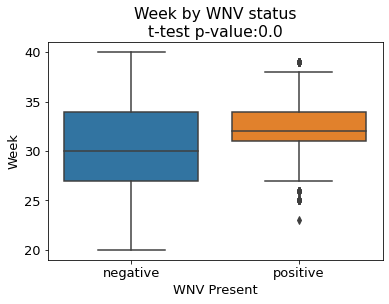

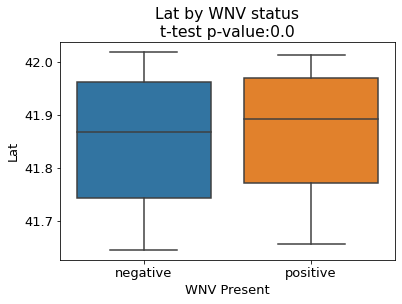

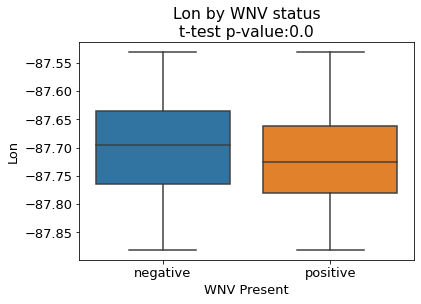

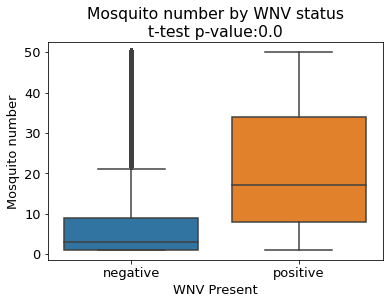

In [26]:
for column in num_columns:
    
    wnv_positive = df.loc[df['WNV Present'] == 'positive',column]
    wnv_negative = df.loc[df['WNV Present'] == 'negative',column]
    
    p_value = stats.ttest_ind(wnv_positive, wnv_negative)[1]
    
    sns.boxplot(x = 'WNV Present',y = column, data = df)
    plt.title(f"{column} by WNV status\nt-test p-value:{round(p_value,4)}")
    plt.show()
    

Some things to take away from the charts above:

- p-value is less than 0.05 for each numerical column
- Hence, we can reject the null hypothesis and conclude that there is a statistically significant difference in Year, Month, Week & Mosquito Number for WNV positive & negative cases.

## Statistical Analysis - Linear Regression

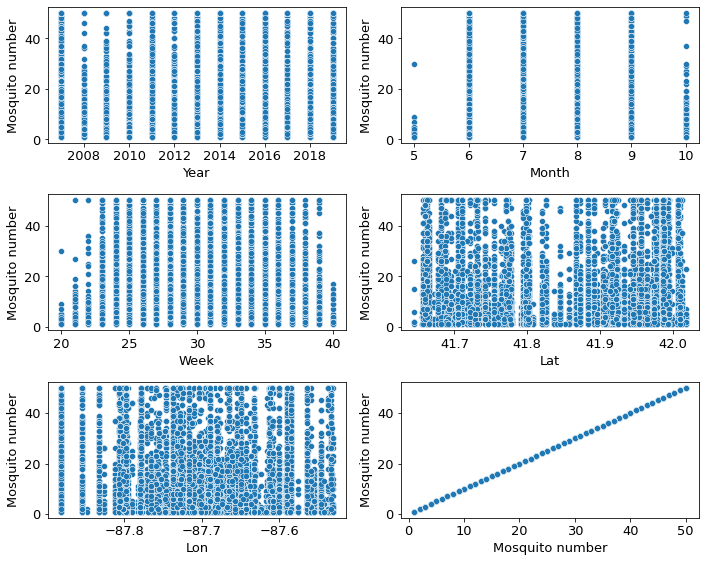

In [27]:
# using scatter plots to visualize the relationship between Mosquito number and our independent variables

plt.subplots(3,2,figsize=(10,8))
plot_num=1
for column in num_columns:
    plt.subplot(3,2,plot_num)
    sns.scatterplot(x = df[column], y = df['Mosquito number'], data = df)
    plt.ylabel('Mosquito number')
    plt.xlabel(column)
    plot_num += 1
    
plt.tight_layout()
plt.show()

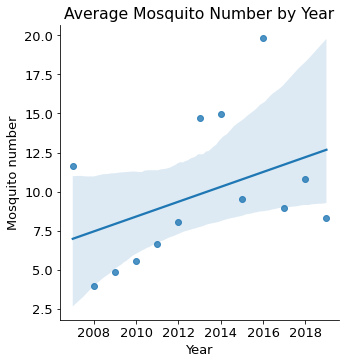

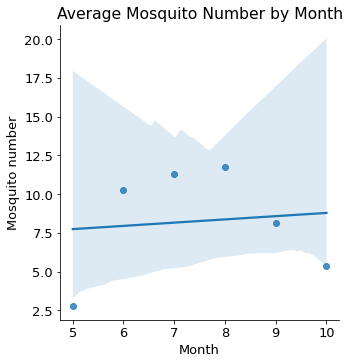

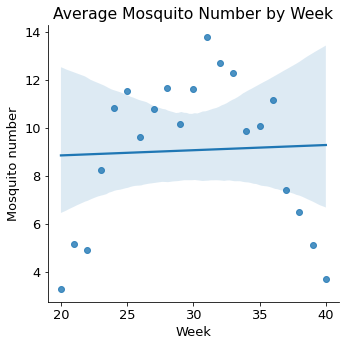

In [28]:
# using Seabon LM plots to visualize the relationship between Mosquito number and date columns
for column in num_columns[:-3]:
    temp = pd.DataFrame(df.groupby(column)['Mosquito number'].mean())
    temp.reset_index(inplace = True)
    sns.lmplot(x = column, y = "Mosquito number", data=temp)
    plt.title('Average Mosquito Number by ' + column)
    plt.ylabel('Mosquito number')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

From the plots above, we can see that the relationship between mosquito and date is not best represented by a linear model. We will continue to analyze the data further, starting by investigating the correlation between mosquito number and the numerical columns:

In [29]:
corr_matrix = df.corr()
corr_matrix

,Year,Month,Week,Lat,Lon,Mosquito number
Year,1.000000,-0.102678,-0.024027,0.083014,-0.075331,0.123473
Month,-0.102678,1.000000,0.949712,-0.017677,0.021638,-0.045054
Week,-0.024027,0.949712,1.000000,-0.010050,0.015161,-0.037638
Lat,0.083014,-0.017677,-0.010050,1.000000,-0.739716,0.083709
Lon,-0.075331,0.021638,0.015161,-0.739716,1.000000,-0.131455
Mosquito number,0.123473,-0.045054,-0.037638,0.083709,-0.131455,1.000000


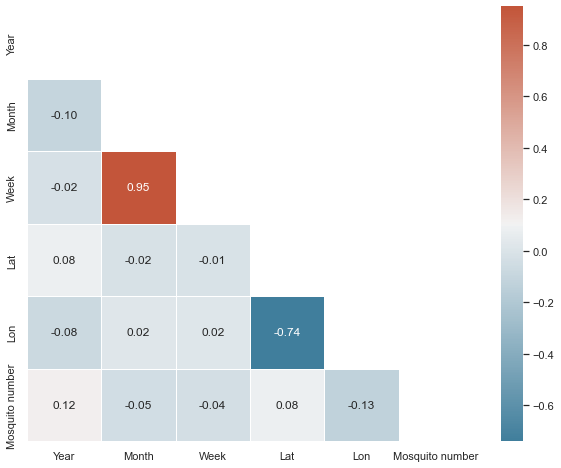

In [30]:
# creating a heatmap of the correlation matrix above using a color scheme 

sns.set(style="white")
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt=".2f", linewidths=.5, mask=mask)
plt.show()

From the correlation matrix above, we can see that the strongest correlation between our numerical variables exists between Month & Week columns. This is expected since both columns are essentially representing the same information. We will drop the Week column from the dataset moving forward since it is redundant.

There is a strong negative correlation between the Longitude and Latitude columns but this is also expected since these columns represent geographical locations instead of float values. We will not consider these columns when trying to develop our linear regression model.

We can see from the heatmap that there is no strong linear correlations between mosquito number and other numerical columns in our dataset as the correlation coefficients range from -0.13 to 0.12.

Using a Pearson test, we can check if the population correlation between independent & dependent variables is equal to 0 or not.

Our hypothesis test is shown below:

$H_0$: the two variables are not correlated, $\rho=0$.

$H_1$: the two variables are correlated, $\rho\neq0$.

In [31]:
stats.pearsonr(df["Year"], df["Mosquito number"])

(0.12347282411486386, 8.526504904172238e-62)

In [32]:
stats.pearsonr(df["Month"], df["Mosquito number"])

(-0.04505417584333572, 1.6127372263671034e-09)

Similarly, the p-value of the correlation coefficients between Year/Month and Mosquito number is significantly lower than the threshold of 0.05. Therefore, we can safely reject the null hypothesis and conclude that there is a statistically significant correlation between Year/Month and mosquito number in the population dataset.

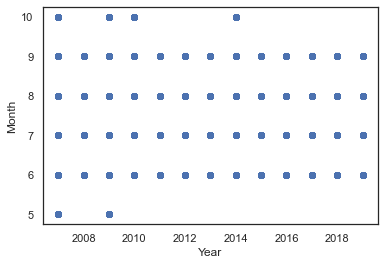

In [33]:
# Check for multicollinearity between our independent variables
plt.figure()
plt.scatter(df['Year'], df['Month'])
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

In [34]:
stats.pearsonr(df["Year"], df["Month"])

(-0.10267786198262542, 3.465966398257226e-43)

With a low p-value of 3.46e-43, we can reject the null hypothesis and conclude that there is a significant correlation between Year and Month in the population dataset. However, correlation coefficient of -0.1 is quite low which suggests a weak negative linear correlation exists between both variables.

Next, we can split our data into dependent and independent variables in order to perform a linear regression:

In [35]:
# independent numerical variables excluding 'Week', 'Lat'/'Lon' & 'Mosquito number'
X = df[df.select_dtypes('number').columns[:2]]
X 

,Year,Month
0,2019,9
1,2019,9
2,2019,9
3,2019,9
4,2019,9
...,...,...
18489,2013,8
18490,2016,9
18491,2007,8
18492,2016,7


In [36]:
y = df['Mosquito number'] # dependent variable

In [37]:
X_withconstant = sm.add_constant(X) # adding constant
X_withconstant

/Users/fejiroobor/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Year,Month
0,1.0,2019,9
1,1.0,2019,9
2,1.0,2019,9
3,1.0,2019,9
4,1.0,2019,9
...,...,...,...
18489,1.0,2013,8
18490,1.0,2016,9
18491,1.0,2007,8
18492,1.0,2016,7


In [38]:
# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model
myregression_results = myregression.fit()

# Model summary
myregression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     148.4
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           1.16e-64
Time:                        23:51:42   Log-Likelihood:                -71763.
No. Observations:               17913   AIC:                         1.435e+05
Df Residuals:                   17910   BIC:                         1.436e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -853.8689     53.913    -15.838      0.000    -959.543    -748.195
Year           0.4311      0.027     16.122      0.000       0.379       0.484
Month         -0.4359      0.099     -4.392      0.000      -0.630      -0.241
==============================================================================
Omnibus:                     5166.500   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11445.484
Skew:                           1.699   Prob(JB):                         0.00
Kurtosis:                       4.947   Cond. No.                     1.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the result above, we can see that the p-value for Year and Month are below 0.05 which indicate that both are statistically significant in predicting mosquito number. However, the R-squared of our linear model is very low (0.016) which shows that it is not an accurate model. This is expected since the trend of mosquito number over time was not linear as shown in the seaborn lm plots above.

There is multicolinearity problems with our linear regression model due to the weak correlation between Year & Mosquito number columns. We can see this at play if we only look at 'Year' vs 'Mosquito number' as shown below
:

In [39]:
# Using only year as the independent variable
X = df[df.select_dtypes('number').columns[:1]]
y = df['Mosquito number'] # dependent variable

X_withconstant = sm.add_constant(X) # adding constant

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model
myregression_results = myregression.fit()

# Model summary
myregression_results.summary()

/Users/fejiroobor/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     277.3
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           8.53e-62
Time:                        23:51:42   Log-Likelihood:                -71773.
No. Observations:               17913   AIC:                         1.435e+05
Df Residuals:                   17911   BIC:                         1.436e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -881.4649     53.573    -16.454      0.000    -986.472    -776.457
Year           0.4432      0.027     16.652      0.000       0.391       0.495
==============================================================================
Omnibus:                     5172.291   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11467.243
Skew:                           1.700   Prob(JB):                         0.00
Kurtosis:                       4.949   Cond. No.                     1.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Statistical Analysis - Adding More Features

In [40]:
# Create dummy variables for the 'Trap type' &'Species' columns
dummy_cols = ['Trap type', 'Species']
dummy_df = pd.get_dummies(df[dummy_cols])

# Combine the original DataFrame with the dummy variables
new_df = pd.concat([df.drop(dummy_cols, axis=1), dummy_df], axis=1)

# Print the new DataFrame
new_df.head()

,Date,Year,Month,Week,Address Block,Lat,Lon,Trap,Mosquito number,WNV Present,Trap type_CDC,Trap type_GRAVID,Trap type_OVI,Trap type_SENTINEL,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS
0,2019-09-26 00:09:00,2019,9,39,100XX W OHARE AIRPORT,41.977738,-87.880969,T910,2,negative,0,1,0,0,0,1,0,0
1,2019-09-26 00:09:00,2019,9,39,52XX S KOLMAR AVE,41.798211,-87.736925,T114,1,negative,0,1,0,0,0,1,0,0
2,2019-09-26 00:09:00,2019,9,39,58XX N WESTERN AVE,41.987245,-87.689417,T028,2,negative,0,1,0,0,0,1,0,0
3,2019-09-26 00:09:00,2019,9,39,39XX N SPRINGFIELD AVE,41.953664,-87.724987,T228,1,negative,0,1,0,0,0,1,0,0
4,2019-09-26 00:09:00,2019,9,39,131XX S BRANDON AVE,41.657069,-87.546049,T209,9,negative,0,1,0,0,0,1,0,0


In [41]:
# Making WNV Present a binary column
new_df['WNV Present'] = np.where(df['WNV Present'] == "positive",1,0)

X = new_df[new_df.select_dtypes('number').columns[:]]
irrelevant_cols = ['Week', 'Lat', 'Lon', 'Mosquito number']

# independent numerical variables excluding 'Week', 'Lat'/'Lon' & 'Mosquito number'
X = X.drop(irrelevant_cols, axis=1)
y = new_df['Mosquito number']

X.head()

,Year,Month,WNV Present,Trap type_CDC,Trap type_GRAVID,Trap type_OVI,Trap type_SENTINEL,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS
0,2019,9,0,0,1,0,0,0,1,0,0
1,2019,9,0,0,1,0,0,0,1,0,0
2,2019,9,0,0,1,0,0,0,1,0,0
3,2019,9,0,0,1,0,0,0,1,0,0
4,2019,9,0,0,1,0,0,0,1,0,0


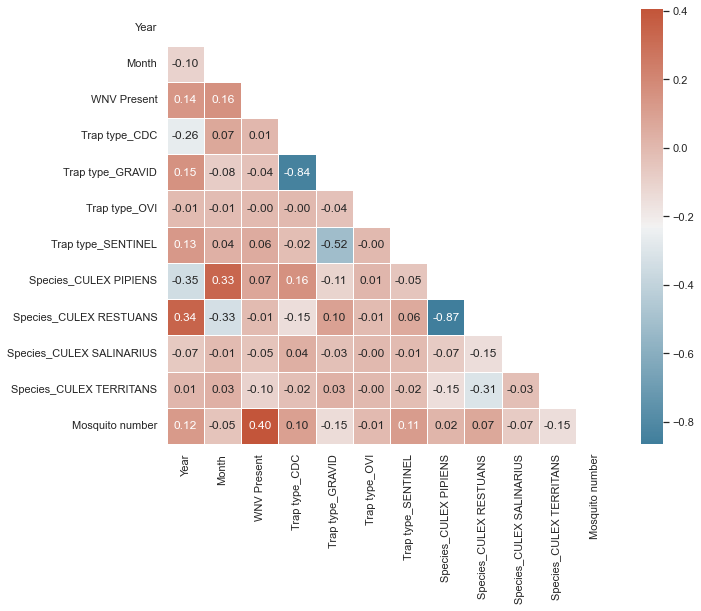

In [42]:
# Creating a heatmap of the correlation matrix

# Combine the original DataFrame with the dummy variables
corr_df = pd.concat([X, y], axis=1)

sns.set(style="white")
mask = np.triu(np.ones_like(corr_df.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.corr(), cmap=cmap, annot=True, fmt=".2f", linewidths=.5, mask=mask)
plt.show()

From the heat map above, we can see that there is strong negative correlations between Trap type_GRAVID & Trap type_CDC, as well as between Species_CULEX PIPIENS & Species_CULEX RESTUANS columns. Without further modelling, it is not certain if these will cause any problems for our models. However, since we expect both species and trap types to be independent in reality, we will keep both columns in our analysis.

We can also note that there is a weak positive linear relationship between mosquito number and WNV Present columns with a correlation coefficient of 0.4. However, since we are trying to predict the number of mosquitos, we will exclude the WNV Present column from the independent variables.

Lastly, there is a weak negative correlation between Mosquito number and Trap type_GRAVID & Species_CULEX TERRITANS although the correlation coefficient is low(-0.15)

In [43]:
X = X.drop('WNV Present', axis=1) #Exclude 'WNV Present' from the independent variables

X_withconstant = sm.add_constant(X) # adding constant

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model
myregression_results = myregression.fit()

# Model summary
myregression_results.summary()

/Users/fejiroobor/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     174.6
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          3.76e-285
Time:                        23:51:42   Log-Likelihood:                -71238.
No. Observations:               17913   AIC:                         1.425e+05
Df Residuals:                   17904   BIC:                         1.426e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -726.9890     38.418    -18.923      0.000    -802.291    -651.687
Year                         0.5494      0.029     19.201      0.000       0.493       0.606
Month                       -0.7034      0.102     -6.872      0.000      -0.904      -0.503
Trap type_CDC             -174.4955      9.880    -17.662      0.000    -193.861    -155.130
Trap type_GRAVID          -185.3415      9.996    -18.542      0.000    -204.934    -165.749
Trap type_OVI             -193.8599     13.962    -13.885      0.000    -221.227    -166.493
Trap type_SENTINEL        -173.2921     10.124    -17.116      0.000    -193.137    -153.447
Species_CULEX PIPIENS     -176.6142      9.576    -18.443      0.000    -195.384    -157.844
Species_CULEX RESTUANS    -177.8916      9.651    -18.433      0.000    -196.808    -158.975
Species_CULEX SALINARIUS  -186.0951      9.595    -19.394      0.000    -204.903    -167.287
Species_CULEX TERRITANS   -186.3881      9.634    -19.347      0.000    -205.272    -167.505
==============================================================================
Omnibus:                     4749.144   Durbin-Watson:                   1.539
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9958.131
Skew:                           1.587   Prob(JB):                         0.00
Kurtosis:                       4.806   Cond. No.                     5.89e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.09e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Evaluating the Linear Model

Next we can perform some diagnostics to evaluate the model:

In [44]:
model_resids = myregression_results.resid

model_fittedvals = myregression_results.fittedvalues

Looking at the histogram of the residuals:

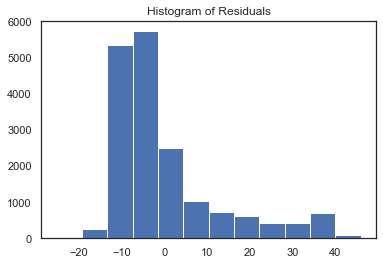

In [45]:
plt.figure()
plt.hist(model_resids, bins = 12)
plt.title('Histogram of Residuals')
plt.show()

As seen in the graph above, the plot of the residuals are not normally distributed. The histogram is heavily skewed to the right

In [46]:
print("Shapiro-Wilk Test: ", stats.shapiro(model_resids))

Shapiro-Wilk Test:  ShapiroResult(statistic=0.8048163652420044, pvalue=0.0)


/Users/fejiroobor/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


From the p-value output of the Shapiro Wilk Test above, we can safely reject the null hyputhesis that our model's residuals come from a normal distribution using a significance level of 0.05.

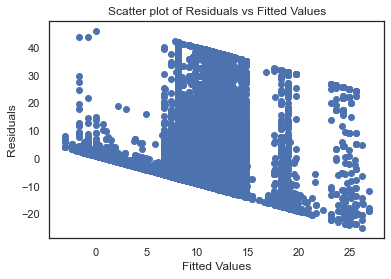

In [47]:
plt.figure()
plt.scatter(model_fittedvals, model_resids)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Scatter plot of Residuals vs Fitted Values')
plt.show()

From the plot above, the variance of error terms is also not similar across the values of the independent variables. Rather than looking like random noise, we can recognize a pattern in the residuals vs fitted values. Therefore, our data violates the principles of Homoscedasticity.

## Statistical Analysis - Logistic Regression

Next, we will try to develop a logistic regression model that aims to predict WNV Presence based on the Date, Mosquito number, Trap type & Mosquito Species.

In [48]:
# Making WNV Present a binary column
new_df['WNV Present'] = np.where(df['WNV Present'] == "positive",1,0)

# Getting Independent variables from numerical columns
# target variable is WNV Presence
# Independent numerical variables excluding 'Week', 'Lat'/'Lon' & 'WNV Present'
# Also excluding 'Trap type_OVI' &'Species_CULEX SALINARIUS' columns to avoid multicolinearity problems
X = new_df[new_df.select_dtypes('number').columns[:]]
irrelevant_cols = ['Week', 'Lat', 'Lon', 'WNV Present', 'Trap type_OVI', 'Species_CULEX SALINARIUS']

X = X.drop(irrelevant_cols, axis=1)
y = new_df['WNV Present']

X.head()

,Year,Month,Mosquito number,Trap type_CDC,Trap type_GRAVID,Trap type_SENTINEL,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX TERRITANS
0,2019,9,2,0,1,0,0,1,0
1,2019,9,1,0,1,0,0,1,0
2,2019,9,2,0,1,0,0,1,0
3,2019,9,1,0,1,0,0,1,0
4,2019,9,9,0,1,0,0,1,0


In [49]:
X_withconstant = sm.add_constant(X) # Add constant
X_withconstant.head()

/Users/fejiroobor/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Year,Month,Mosquito number,Trap type_CDC,Trap type_GRAVID,Trap type_SENTINEL,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX TERRITANS
0,1.0,2019,9,2,0,1,0,0,1,0
1,1.0,2019,9,1,0,1,0,0,1,0
2,1.0,2019,9,2,0,1,0,0,1,0
3,1.0,2019,9,1,0,1,0,0,1,0
4,1.0,2019,9,9,0,1,0,0,1,0


In [50]:
# Instantiate the model
model = sm.Logit(y, X_withconstant)

# Fit the model
model_results = model.fit()
model_results.summary()

         Current function value: 0.382771
         Iterations: 35


/Users/fejiroobor/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                17913
Model:                          Logit   Df Residuals:                    17903
Method:                           MLE   Df Model:                            9
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                  0.2139
Time:                        23:51:43   Log-Likelihood:                -6856.6
converged:                      False   LL-Null:                       -8722.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -270.4831   3188.326     -0.085      0.932   -6519.487    5978.521
Year                        0.1242      0.007     17.444      0.000       0.110       0.138
Month                       0.6293      0.026     24.603      0.000       0.579       0.679
Mosquito number             0.0675      0.001     45.274      0.000       0.065       0.070
Trap type_CDC              11.8020   3188.294      0.004      0.997   -6237.139    6260.743
Trap type_GRAVID           12.2135   3188.294      0.004      0.997   -6236.727    6261.154
Trap type_SENTINEL         11.7446   3188.294      0.004      0.997   -6237.196    6260.685
Species_CULEX PIPIENS       1.2830      0.398      3.222      0.001       0.502       2.064
Species_CULEX RESTUANS      0.9471      0.398      2.381      0.017       0.168       1.727
Species_CULEX TERRITANS    -1.1445      0.480     -2.384      0.017      -2.085      -0.203
===========================================================================================
"""

Based on the results returned above, we can note that:

- p-values for Trap type columns are greater than the threshold of 0.05. Hence, we can conclude that they are not significant in predicting WNV Presence
- However Year, Month, Species and Mosquito number have p-values below 0.05. This means that these variables provide some insight into predicting WNV presence.

Re-running the model excluding CDC, GRAVID & SENTINEL trap type columns:

In [51]:
# Making WNV Present a binary column
new_df['WNV Present'] = np.where(df['WNV Present'] == "positive",1,0)

X = new_df[new_df.select_dtypes('number').columns[:]]
irrelevant_cols = ['Week', 'Lat', 'Lon', 'WNV Present', 'Trap type_GRAVID', 'Trap type_SENTINEL', \
                   'Trap type_CDC','Trap type_OVI', 'Species_CULEX SALINARIUS']

X = X.drop(irrelevant_cols, axis=1)
y = new_df['WNV Present']

X.head()

,Year,Month,Mosquito number,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX TERRITANS
0,2019,9,2,0,1,0
1,2019,9,1,0,1,0
2,2019,9,2,0,1,0
3,2019,9,1,0,1,0
4,2019,9,9,0,1,0


In [52]:
X_withconstant = sm.add_constant(X) # Add constant
X_withconstant.head()

# Instantiate the model
model = sm.Logit(y, X_withconstant)

# Fit the model
model_results = model.fit()
model_results.summary()

Optimization terminated successfully.
         Current function value: 0.383231
         Iterations 8


/Users/fejiroobor/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                17913
Model:                          Logit   Df Residuals:                    17906
Method:                           MLE   Df Model:                            6
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                  0.2129
Time:                        23:51:43   Log-Likelihood:                -6864.8
converged:                       True   LL-Null:                       -8722.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -264.8570     13.750    -19.263      0.000    -291.806    -237.908
Year                        0.1275      0.007     18.674      0.000       0.114       0.141
Month                       0.6196      0.025     24.385      0.000       0.570       0.669
Mosquito number             0.0662      0.001     45.697      0.000       0.063       0.069
Species_CULEX PIPIENS       1.3110      0.401      3.268      0.001       0.525       2.097
Species_CULEX RESTUANS      0.9809      0.401      2.448      0.014       0.196       1.766
Species_CULEX TERRITANS    -1.1106      0.482     -2.302      0.021      -2.056      -0.165
===========================================================================================
"""

In [53]:
params = round (model_results.params, 3)
params

const                     -264.857
Year                         0.127
Month                        0.620
Mosquito number              0.066
Species_CULEX PIPIENS        1.311
Species_CULEX RESTUANS       0.981
Species_CULEX TERRITANS     -1.111
dtype: float64

Our model now becomes

$$ s(X) = P(y|X) = \frac{1}{1+e^{-(-264.86 + 0.0127 x_1 + 0.620 x_2 + 0.066 x_3 + 1.311 x_4 + 0.981 x_5 - 1.111 x_6)}}$$


In [54]:
# Finding the odds ratio for each of our independent variables

for i in params:
    beta_i = np.exp(params)
    print(round(beta_i, 3))
    break

const                      0.000
Year                       1.135
Month                      1.859
Mosquito number            1.068
Species_CULEX PIPIENS      3.710
Species_CULEX RESTUANS     2.667
Species_CULEX TERRITANS    0.329
dtype: float64


Based on the odds ratios above, we can say that:


- One unit increase in year, increases the odds of our test being WNV positive by a factor of 1.135
- Similarly, increase of one month increases the odss of WNV positive test by a factor of 1.86
- One unit increase in number of mosquito observed increases the odds of postive WNV test by a factor of 1.07
- One unit increase in the presence of CULEX PIPENS species, increases the odds of our test being WNV positive by a factor of 3.71
- One unit increase in the presence of CULEX RESTUANS species, increases the odds of our test being WNV positive by a factor of 2.67
- Increase in the presence of CULEX TERRITANS species decreases the odds of our test being WNV positive as the odds ratio is less than 1

It is reasonable to expect that our chances of testing positive for WNV increases as we increase the number of mosquitoes being tested. Since it starts to rain more and the temperatures get warmer in the summer, we can also expect an increase in the likelihood of testing positive for WNV. Lastly, since PIPIENS & RESTUANS were the most observed species in our dataset which also had the highest number of WNV positive cases, we can expect a higher probability of positive WNV cases when these species are abundant in an area. 